In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import signal
from scipy.fftpack import dct, idct, fft, ifft

import MEArec as mr
import MEAutility
import spikeinterface as si
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.extractors as se
import spikeinterface.comparison as sc
import spikeinterface.sorters as ssort
import spikeinterface.widgets as sw

It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.


In [2]:
# given a numpy array v with the dimension (# of frames, framge_raws, frame_columns)
# import matplotlib.animation as animation
# def make_gif(v):
#     plt.rcParams['figure.figsize'] = [15,10]
#     fig = plt.figure()
#     s = v[:,:100,0]
#     im = plt.imshow(s, animated=True)

#     def updatefig(i):
#         im.set_array(v[:,:500,i])
#         return im,
#     anim = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
#     plt.colorbar()
#     # saving to m4 using ffmpeg writer
#     writervideo = animation.FFMpegWriter(fps=10)
#     anim.save('channel_plot.gif', writer=writervideo)
#     plt.close()

In [3]:
def make_sparse(x,t):
    l = x.reshape(-1)
    p = np.argsort(np.abs(l))[-t]
    s = np.ma.masked_where(np.abs(x) < np.abs(l[p]), x)
    y = np.ma.filled(s.astype(float), 0.0)
    return y  

### w list of the windows lengths and cell list of neuro configs.

In [4]:
# w = [100, 200, 500, 1000, 10000, 100000]
# avg=0
# cell=[10,20,30]
# d_cell = {}
# for c in cell:
#     print('start --------------------------------------------------', 'n_cell:' + str(c))
#     d_config={}
#     for k in range(10):
#         print('-----start ---------------------------------------------', 'config:' + str(k))
        
#         recording60, gt60 = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(c,k))
#         sv = recording60.get_traces().T
#         ns = recording60.get_num_samples()
#         nch = recording60.get_num_channels()
#         fs = recording60.get_sampling_frequency()
#         nseg = recording60.get_num_segments()
#         probe = recording60.get_probe()
 
#         d_w = {}
#         for wl in w:
#             print('----------start ----------------------------------------', 'window = ', wl)
#             bc = signal.windows.boxcar(wl, sym=True)
#             f, t, Zxx = signal.stft(sv, fs=fs, window=bc, nperseg=wl)

#             Zxx_t = []
#             for i in range(Zxx.shape[-1]): 
#                 vdct = dct(Zxx[:,:,i] , axis=0)
#                 vidct = idct(make_sparse(vdct.real, (wl*nch)//100//2)+1j*vdct.imag , axis=0)/nch/2
#                 Zxx_t.append(vidct)
#             Zxx_t = np.swapaxes(Zxx_t,1,0)
#             Zxx_t = np.swapaxes(Zxx_t,1,2)
#             _,sv_t = signal.istft(Zxx_t, fs=fs, window=bc, nperseg=wl)

#             recording60_t = se.NumpyRecording(sv_t.T, sampling_frequency=fs)
#             probe = recording60.get_probe() # get the probe from orginal recording
#             recording60_t = recording60_t.set_probe(probe)


#             sorting_IC_t = ss.run_ironclust(recording=recording60_t, output_folder='tmp_IC')
#             comparison_gt = sc.compare_sorter_to_ground_truth(tested_sorting=sorting_IC_t, gt_sorting=gt60, exhaustive_gt=True) 
#             cmp_perf = comparison_gt.get_performance().astype('float32')
#             cmp_perf.describe().loc[['mean', 'std']]
#             avg_perf = cmp_perf.describe().loc['mean'][['accuracy','recall', 'precision']].mean()
#             print('avg_perf:',avg_perf)
            
#             d_w['WidnowSize_'+str(wl)] = avg_pref
  
#         d_config['config_'+str(k)] = d_w

#     d_cell['n_cells_'+str(c)] = d_config
    
#np.save('data/MEA10*10/adapt_window.npy', d_cell)

In [2]:
data = np.load('data/MEA10*10/adapt_window.npy',allow_pickle='TRUE')

In [3]:
df_10 = pd.DataFrame(data.item()['n_cells_10'])
df_10

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
WidnowSize_100,"(0.9570025006930033, 0.08927064761519432)","(0.9792481064796448, 0.025766583159565926)","(0.9853857358296713, 0.022410040721297264)","(0.9686180353164673, 0.04734006027380625)","(0.9514963229497274, 0.08517640953262647)","(0.8818295001983643, 0.31076865394910175)","(0.8595774173736572, 0.31756356358528137)","(0.9519303242365519, 0.09694392420351505)","(0.9884581565856934, 0.019166282067696255)","(0.9806756178538004, 0.025375160078207653)"
WidnowSize_200,"(0.9820539553960165, 0.03353639661024014)","(0.9833001494407654, 0.022742438440521557)","(0.986793041229248, 0.02444302166501681)","(0.9788144032160441, 0.034745488626261554)","(0.9694053928057352, 0.033711555413901806)","(0.8910595575968424, 0.3133228321870168)","(0.8649737437566122, 0.32244156797726947)","(0.9412648479143778, 0.12037032345930736)","(0.989016592502594, 0.019066848792135715)","(0.9720556537310282, 0.062057606875896454)"
WidnowSize_500,"(0.9799924492835999, 0.039262777815262474)","(0.9823152820269266, 0.02495278666416804)","(0.9871342182159424, 0.025014125431577366)","(0.9695477286974589, 0.05231246165931225)","(0.9772128264109293, 0.02825765187541644)","(0.8899922370910645, 0.3130825360616048)","(0.8824294606844584, 0.3131149609883626)","(0.9488147298494974, 0.10448711117108662)","(0.9876346190770467, 0.02062492414067189)","(0.9770736893018087, 0.03638425717751185)"
WidnowSize_1000,"(0.9764405886332194, 0.05135422572493553)","(0.8835223714510599, 0.31146971384684247)","(0.9879202842712402, 0.024524390697479248)","(0.9751802285512289, 0.05790212098509073)","(0.9740224480628967, 0.03497239761054516)","(0.981681744257609, 0.02163836018492778)","(0.8601780335108439, 0.31929945945739746)","(0.9512583017349243, 0.10429553439219792)","(0.9854156374931335, 0.024152797336379688)","(0.979900856812795, 0.029774976894259453)"
WidnowSize_10000,"(0.970686654249827, 0.06960394730170567)","(0.9810436169306437, 0.029902974143624306)","(0.9847189585367838, 0.025384377067287762)","(0.9778286814689636, 0.03970389813184738)","(0.9754449526468912, 0.03228085612257322)","(0.9812166690826416, 0.024193506687879562)","(0.8645843267440796, 0.32230008641878766)","(0.9478621085484823, 0.11024216065804164)","(0.9835371971130371, 0.028394609379271667)","(0.9789096514383951, 0.03383912704885006)"
WidnowSize_100000,"(0.9838398496309916, 0.03474583989009261)","(0.9769661625226339, 0.03232802512745062)","(0.9856638113657633, 0.02659717450539271)","(0.9807029366493225, 0.039428855602939926)","(0.9735238750775655, 0.037425886218746506)","(0.9866735935211182, 0.014897569936389724)","(0.8584198951721191, 0.3171897232532501)","(0.9525284369786581, 0.10241985600441694)","(0.987659215927124, 0.020862930454313755)","(0.9703763127326965, 0.0644597327336669)"


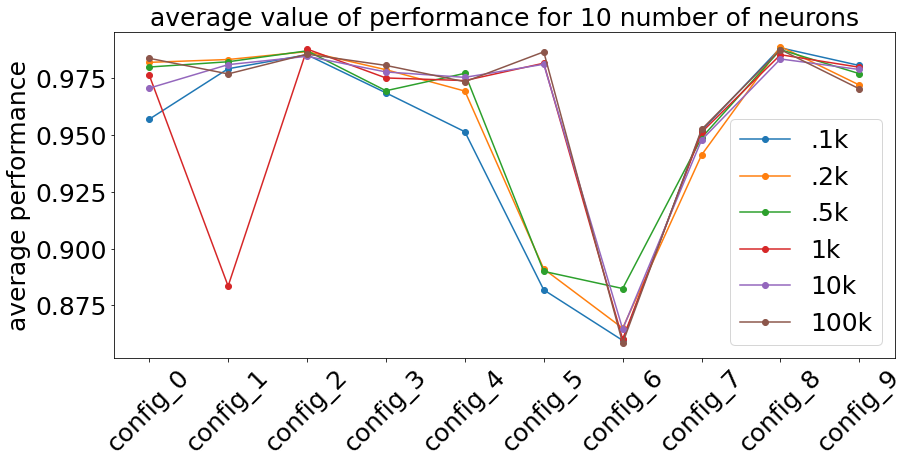

In [15]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.ylabel('average performance', fontsize=25)
plt.title('average value of performance for 10 number of neurons', fontsize=25)
config = ['config_'+str(k) for k in range(10)]
w = ['.1k','.2k','.5k','1k','10k','100k']
for i in range(6):
    mean = []
    for j in range(10):
        mean.append(df_10.iloc[i][j][0])
    plt.plot(config,mean,'o-')
plt.legend(w, fontsize=25)

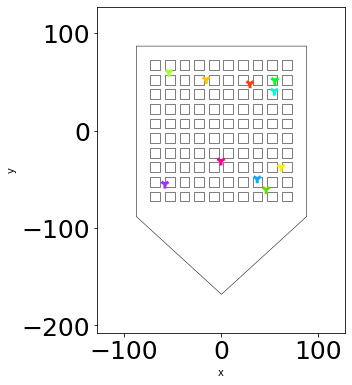

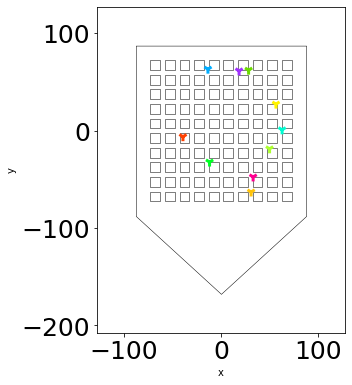

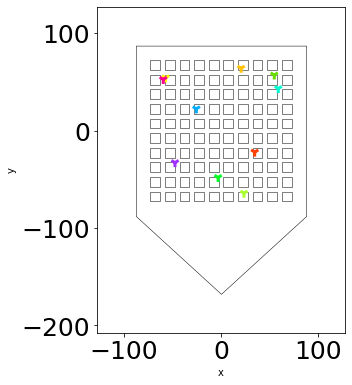

In [10]:
plt.rcParams['figure.figsize'] = [8,6]
recording1, gt1 = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(10,0))
recording6, gt6 = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(10,6))
recording8, gt8 = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(10,8))
we = si.extract_waveforms(recording1, gt1, 'tmp', overwrite=True)
sw.plot_unit_localization(we)
we = si.extract_waveforms(recording6, gt6, 'tmp', overwrite=True)
sw.plot_unit_localization(we)
we = si.extract_waveforms(recording8, gt8, 'tmp', overwrite=True)
sw.plot_unit_localization(we)

In [16]:
df_20 = pd.DataFrame(data.item()['n_cells_20'])
df_20

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
WidnowSize_100,"(0.9609664678573608, 0.04064111659924189)","(0.9518722693125407, 0.054642871022224426)","(0.9662179549535116, 0.06876982251803081)","(0.9580917755762736, 0.0682874886939923)","(0.9582075277964274, 0.061427791292468704)","(0.9486400087674459, 0.07334073757131894)","(0.9381282528241476, 0.08912913004557292)","(0.9423931837081909, 0.07307614882787068)","(0.9698581298192342, 0.030210716649889946)","(0.9260435104370117, 0.21995342274506888)"
WidnowSize_200,"(0.9641722440719604, 0.037344999611377716)","(0.9370781183242798, 0.09426655371983846)","(0.9792922536532084, 0.020590701140463352)","(0.9681758681933085, 0.03849584795534611)","(0.9597261945406595, 0.06230858899652958)","(0.9571248690287272, 0.04523283119002978)","(0.9512784481048584, 0.07268926252921422)","(0.9448442061742147, 0.06853457664450009)","(0.9736838738123575, 0.02701403604199489)","(0.9325902660687765, 0.22029015918572745)"
WidnowSize_500,"(0.9570695360501608, 0.051755049576361976)","(0.954705278078715, 0.0770114076634248)","(0.9823006391525269, 0.019370127702131867)","(0.9711692531903585, 0.031922029331326485)","(0.9091727137565613, 0.2270935078461965)","(0.9637870589892069, 0.04203006438910961)","(0.9539443651835123, 0.06998106961448987)","(0.9670484860738119, 0.03305044025182724)","(0.9740858276685079, 0.026227527298033237)","(0.9310317039489746, 0.21989472210407257)"
WidnowSize_1000,"(0.9652080337206522, 0.038828788325190544)","(0.911855677763621, 0.22115369141101837)","(0.9802940289179484, 0.019176268639663856)","(0.9736137787501017, 0.02451926190406084)","(0.9121458927790324, 0.22720650831858316)","(0.9631380240122477, 0.038566590597232185)","(0.9566451708475748, 0.06926765665411949)","(0.9567339619000753, 0.06073940917849541)","(0.9776941537857056, 0.021945833538969357)","(0.9729065299034119, 0.037708294888337456)"
WidnowSize_10000,"(0.9631009300549825, 0.037352304905653)","(0.8999425967534384, 0.22223338981469473)","(0.9828662474950155, 0.017528644607712824)","(0.9766042828559875, 0.021168471314013004)","(0.9688194195429484, 0.05997178703546524)","(0.9611462354660034, 0.03957177388171355)","(0.9047629038492838, 0.22604654232660928)","(0.9630785584449768, 0.039728703598181404)","(0.9755250612894694, 0.0242124292999506)","(0.9785645206769308, 0.02248697231213252)"
WidnowSize_100000,"(0.9645288983980814, 0.03954715530077616)","(0.9540291229883829, 0.05883096158504486)","(0.98186856508255, 0.019024793912346166)","(0.9761696259180704, 0.020443421478072803)","(0.9770878752072653, 0.019176599724839132)","(0.9603069424629211, 0.05076003447175026)","(0.9555935859680176, 0.07058693716923396)","(0.9567270676294962, 0.054254708190759025)","(0.9763081669807434, 0.024813337872425716)","(0.935191790262858, 0.22073949873447418)"


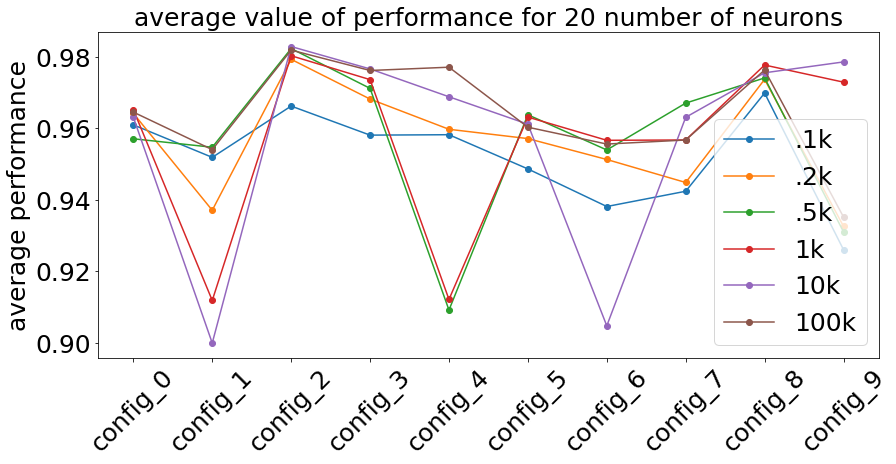

In [19]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.ylabel('average performance', fontsize=25)
plt.title('average value of performance for 20 number of neurons', fontsize=25)
config = ['config_'+str(k) for k in range(10)]
w = ['.1k','.2k','.5k','1k','10k','100k']
for i in range(6):
    mean = []
    for j in range(10):
        mean.append(df_20.iloc[i][j][0])
    plt.plot(config,mean,'o-')
plt.legend(w, fontsize=25)

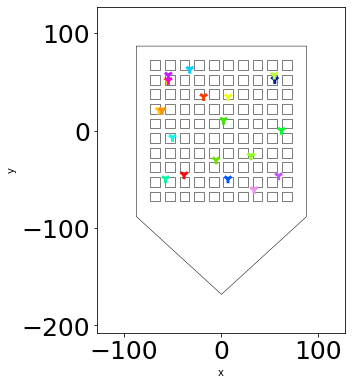

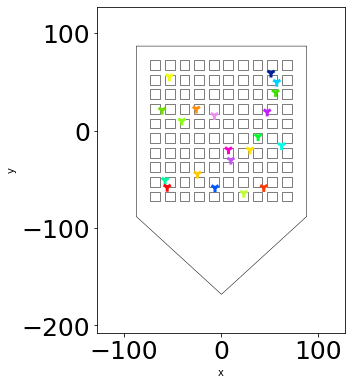

In [11]:
plt.rcParams['figure.figsize'] = [8,6]
recording1, gt1 = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(20,0))
recording8, gt8 = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(20,8))
we = si.extract_waveforms(recording1, gt1, 'tmp', overwrite=True)
sw.plot_unit_localization(we)
we = si.extract_waveforms(recording8, gt8, 'tmp', overwrite=True)
sw.plot_unit_localization(we)

In [21]:
df_30 = pd.DataFrame(data.item()['n_cells_30'])
df_30

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
WidnowSize_100,"(0.9106334447860718, 0.1863309144973755)","(0.9485931197802225, 0.05145052199562391)","(0.9301147063573202, 0.08834093312422435)","(0.9484001398086548, 0.06814800140758355)","(0.8865946928660074, 0.24710396925608316)","(0.9441374937693278, 0.052701396867632866)","(0.9658293525377909, 0.02783440767476956)","(0.8651733001073202, 0.2984489897886912)","(0.9339200854301453, 0.07569733262062073)","(0.9283671975135803, 0.17760290205478668)"
WidnowSize_200,"(0.9530488053957621, 0.04222674481570721)","(0.9580433368682861, 0.044203793009122215)","(0.9392448663711548, 0.06992198278506596)","(0.9251211682955424, 0.17928244670232138)","(0.9213581879933676, 0.18222160140673319)","(0.944454570611318, 0.058345804611841835)","(0.965936005115509, 0.02707563992589712)","(0.9625237584114075, 0.046546820551157)","(0.8985501726468405, 0.1894618719816208)","(0.93191925684611, 0.17777608831723532)"
WidnowSize_500,"(0.958849827448527, 0.03553859889507294)","(0.9552699526151022, 0.049179647117853165)","(0.944113294283549, 0.06810501342018445)","(0.9299325545628866, 0.17932465175787607)","(0.9270184437433878, 0.18089171747366586)","(0.9451867739359537, 0.057480018585920334)","(0.9664717713991801, 0.027781421318650246)","(0.963848869005839, 0.05144913618763288)","(0.9324149290720621, 0.08074996620416641)","(0.9325342973073324, 0.17821156481901804)"
WidnowSize_1000,"(0.9584075411160787, 0.035375647246837616)","(0.957314689954122, 0.045142773538827896)","(0.9469332098960876, 0.06885247429211934)","(0.9280218680699667, 0.17946137487888336)","(0.9165391524632772, 0.18890129029750824)","(0.9496050278345743, 0.05554764034847418)","(0.9601746996243795, 0.051526717841625214)","(0.9289930860201517, 0.18724109729131064)","(0.9352571765581766, 0.07677867884437244)","(0.9312570691108704, 0.1786724974711736)"
WidnowSize_10000,"(0.9528313477834066, 0.05150249103705088)","(0.9504034121831259, 0.06709456692139308)","(0.9327882329622904, 0.08773369838794072)","(0.9272495905558268, 0.17958572010199228)","(0.9281861384709676, 0.18110263347625732)","(0.9469973047574362, 0.06122943510611852)","(0.9680784344673157, 0.02796558476984501)","(0.9633530974388123, 0.05627078004181385)","(0.9065640370051066, 0.1904960721731186)","(0.8976450363794962, 0.24605225523312887)"
WidnowSize_100000,"(0.9602114160855612, 0.03364001493901014)","(0.9501446485519409, 0.07143216331799825)","(0.9381513595581055, 0.08189682600398858)","(0.9311971863110861, 0.17930283149083456)","(0.9226463238398234, 0.18337643643220267)","(0.9475969870885214, 0.061061594635248184)","(0.9672871232032776, 0.028205419580141704)","(0.9648301800092062, 0.05659249176581701)","(0.93655393520991, 0.07811507458488147)","(0.9338509639104208, 0.17799116671085358)"


In [22]:
df_30.to_csv('data/MEA10*10/cells_30')

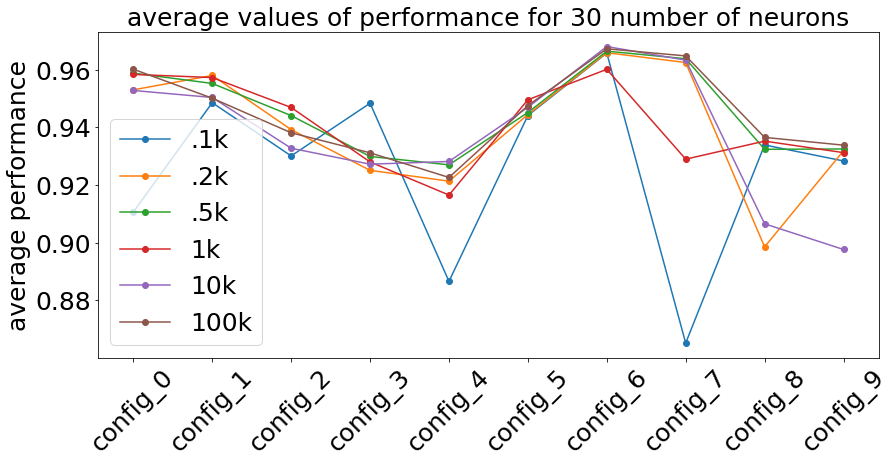

In [24]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.ylabel('average performance', fontsize=25)
plt.title('average values of performance for 30 number of neurons', fontsize=25)
config = ['config_'+str(k) for k in range(10)]
w = ['.1k','.2k','.5k','1k','10k','100k']
for i in range(6):
    mean = []
    for j in range(10):
        mean.append(df_30.iloc[i][j][0])
    plt.plot(config,mean,'o-')
plt.legend(w, fontsize=25)

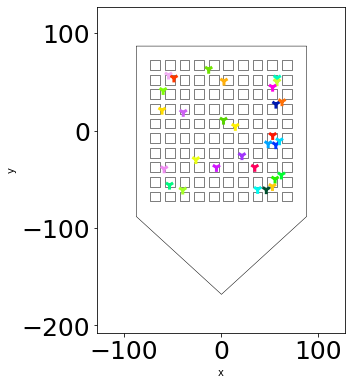

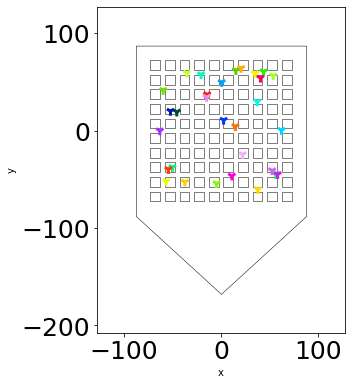

In [25]:
plt.rcParams['figure.figsize'] = [8,6]
recording6, gt6 = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(30,6))
recording8, gt8 = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(30,8))
we = si.extract_waveforms(recording6, gt6, 'tmp', overwrite=True)
sw.plot_unit_localization(we)
we = si.extract_waveforms(recording8, gt8, 'tmp', overwrite=True)
sw.plot_unit_localization(we)